In [1]:
import tensorflow as tf
import pickle
import numpy as np
import timeit
import load_cifar
import matplotlib.pyplot as plt
import time

In [22]:
tf.reset_default_graph()
# get validation data
val_data, val_labels = load_cifar.load_preprocessed_validation_batch()
test_data, test_labels = load_cifar.load_preprocessed_test_batch()

<h1>Hyperparameter</h1>

In [23]:
num_epochs = 10
batch_size = 128

<h1>Placeholder</h1>

In [24]:
x_data = tf.placeholder(tf.float32, shape=(None, 32, 32, 3))
y_labels = tf.placeholder(tf.float32, shape=(None, 10))

<h1>LeNet-5</h1>

In [25]:
# copy and paste from part a
# LeNet 5 implements trainable average pooling layers
# in addition to convolutional layers that dont convolve over the
# whole feature map. Here we omit these features and
# copy the general structure, using max pool, and full conv layers
# They also use sigmoids in the convolution, omitted here
# and RBF for loss. we just use cross entropy

# c1: convolution2d
c1 = tf.layers.conv2d(x_data, filters=6, kernel_size=5, activation=tf.nn.sigmoid)

# s1: ave pool nontrainable substituted for trainable average pool
s1 = tf.layers.average_pooling2d(c1, pool_size=2, strides=2)

# c2: convolution 2d size (5,5, 10)
c2 = tf.layers.conv2d(s1, filters=16, kernel_size=5)

# s3: ave pool nontrainable substitute for ave pool
s2 = tf.layers.average_pooling2d(c2, pool_size=2, strides=2)

# c4: 1x1 conv layer
c3 = tf.layers.conv2d(s2, filters=120, kernel_size=1, activation=tf.nn.sigmoid)

# flatten for fully connect
c3_flat = tf.layers.flatten(c3)

# dense
d4 = tf.layers.dense(c3_flat, units=84, activation=tf.nn.sigmoid)

# output
out = tf.layers.dense(d4, units=10)


<h1>Cost and Optimization</h1>

In [26]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_labels, logits=out))
opt = tf.train.AdamOptimizer()
to_minimize = opt.minimize(cost)

# compare prediction accuracy 
correct_pred = tf.equal(tf.argmax(tf.nn.softmax(out),1),tf.argmax(y_labels,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name='accuracy')


<h1>Training, validation and testing</h1>
<h2>Train your model only 10 epochs.</h2>
<h2>1.Print out validation accuracy after each training epoch</h2>
<h2>2.Print out training time for each training epoch</h2>
<h2>3.Print out testing accuracy</h2>

In [27]:
init = tf.global_variables_initializer()
epochs, losses = [], []
with tf.Session() as sess:
    sess.run(init)
    for i in range(num_epochs):
        start = time.time()
        print('Training for Epoch: \t' + str(i))
        for batch_num in range(1, 6):
            print('Training for Batch: \t' + str(batch_num))
            training_data = load_cifar.load_preprocessed_training_batch(batch_num, batch_size)
            for data, labels in training_data:
                f_dict = {x_data: np.reshape(data, (-1, 32, 32, 3)), y_labels: labels}
                sess.run(to_minimize, feed_dict=f_dict)
        #print('Current Loss is : \t')
        current_loss = sess.run(cost, feed_dict=f_dict)
        losses.append(current_loss)
        epochs.append(i)
        #print(current_loss)
        #print('Current minibatch accuracy is: \t')
        #current_acc = sess.run(accuracy, feed_dict=f_dict)
        #print(current_acc)
        print('Current validation set accuracy is: \t')
        val_acc = sess.run(accuracy, feed_dict={x_data:np.reshape(val_data, (-1, 32, 32, 3)), y_labels:val_labels})
        print(val_acc)
        print('Time to train epoch \t')
        print(time.time() - start)
    test_acc = sess.run(accuracy, feed_dict={x_data: np.reshape(test_data, (-1, 32, 32, 3)), y_labels: test_labels})

        

Training for Epoch: 	0
Training for Batch: 	1
Training for Batch: 	2
Training for Batch: 	3
Training for Batch: 	4
Training for Batch: 	5
Current validation set accuracy is: 	
0.103
Time to train epoch 	
2.926572322845459
Training for Epoch: 	1
Training for Batch: 	1
Training for Batch: 	2
Training for Batch: 	3
Training for Batch: 	4
Training for Batch: 	5
Current validation set accuracy is: 	
0.2908
Time to train epoch 	
2.4780161380767822
Training for Epoch: 	2
Training for Batch: 	1
Training for Batch: 	2
Training for Batch: 	3
Training for Batch: 	4
Training for Batch: 	5
Current validation set accuracy is: 	
0.3172
Time to train epoch 	
2.290691614151001
Training for Epoch: 	3
Training for Batch: 	1
Training for Batch: 	2
Training for Batch: 	3
Training for Batch: 	4
Training for Batch: 	5
Current validation set accuracy is: 	
0.3414
Time to train epoch 	
2.2953310012817383
Training for Epoch: 	4
Training for Batch: 	1
Training for Batch: 	2
Training for Batch: 	3
Training for Ba

Text(0.5, 1.0, 'Test Accuracy: \t 0.4326')

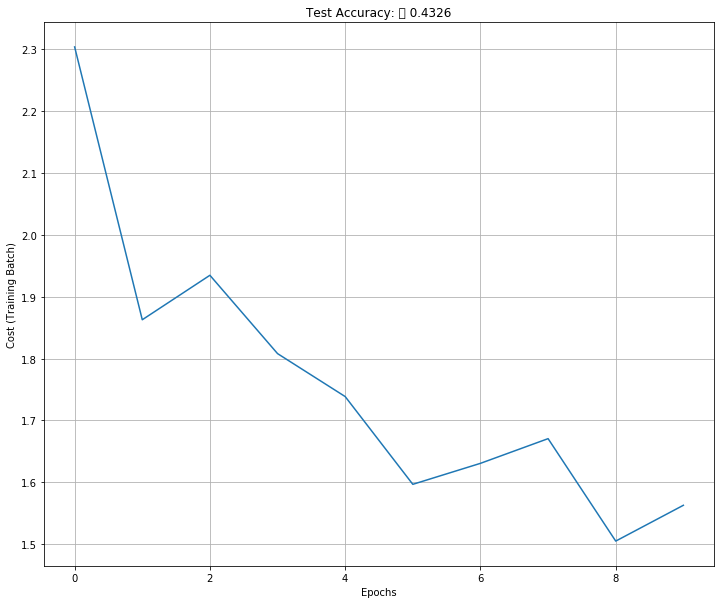

In [28]:
# i cant reach %60 without modifying the network
plt.figure(1, figsize=(12,10))
plt.plot(epochs, losses)
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Cost (Training Batch)')
plt.title('Test Accuracy: \t ' + str(test_acc))